# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Links:
python library: https://pypi.python.org/pypi/citipy

Weather api: https://openweathermap.org/api

In [3]:
import random
from citipy import citipy
import requests
import json
from pprint import pprint
from api_keys import weather_api_key
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress

## Generate Cities List

In [4]:
# Generate cities lists
cities = []

# Loop to create randon latitudes and longitudes
for i in range(0,1500):
    lat = round(random.uniform(-90,90),2)
    lng = round(random.uniform(-180,180),2)
    # Use citipy to find the nearest city to the (lat, lng)
    city = citipy.nearest_city(lat, lng)
    # Use citipy to return the name of the neareat city
    city_name = city.city_name
    # Append city name to city list
    cities.append(city_name)
# Remove any duplicates in the cities list
cities = list(dict.fromkeys(cities))
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build base URL for API call
weather_response = []
base_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=imperial" + "&q="
counter = 0

#create lists empty lists to hold desired data
city_name = []
latitude = []
longitude = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []

# API call loop
for citi in cities:
    query_url = base_url + citi
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record | {citi}")
    except:
        print(f"City not found | {citi}")
print("** API call complete **")

Processing Record | aksarka
Processing Record | canico
City not found | illoqqortoormiut
Processing Record | teshie
Processing Record | ribeira grande
Processing Record | bredasdorp
Processing Record | anadyr
Processing Record | georgetown
City not found | taolanaro
Processing Record | punta arenas
Processing Record | fairbanks
Processing Record | puerto ayora
Processing Record | yellowknife
Processing Record | tuatapere
Processing Record | kapaa
Processing Record | dunedin
Processing Record | faya
Processing Record | hobart
Processing Record | bud
City not found | belushya guba
Processing Record | quirinopolis
Processing Record | rikitea
Processing Record | hermanus
Processing Record | butaritari
Processing Record | busselton
Processing Record | dikson
Processing Record | mataura
Processing Record | bengkulu
Processing Record | barrow
Processing Record | tuktoyaktuk
Processing Record | esperance
Processing Record | mapiripan
Processing Record | plettenberg bay
City not found | nizhney

Processing Record | lorengau
Processing Record | constitucion
City not found | mogochin
Processing Record | beloha
Processing Record | salalah
Processing Record | mackay
Processing Record | berdigestyakh
Processing Record | port-cartier
City not found | bolshoy tsaryn
Processing Record | tabas
Processing Record | sambava
Processing Record | great yarmouth
City not found | warqla
Processing Record | bentiu
Processing Record | saint-pierre
Processing Record | arlit
Processing Record | coquimbo
Processing Record | dhidhdhoo
Processing Record | yulara
Processing Record | makhalino
Processing Record | mezhdurechenskiy
Processing Record | omsukchan
Processing Record | shelburne
Processing Record | meulaboh
Processing Record | lamu
Processing Record | gazli
Processing Record | vodyane
Processing Record | maragogi
Processing Record | sao joao da barra
Processing Record | lethem
Processing Record | sangar
Processing Record | mount isa
Processing Record | clyde river
Processing Record | verkhoya

Processing Record | spirovo
Processing Record | mayumba
City not found | zachagansk
Processing Record | kirkconnel
Processing Record | payo
Processing Record | new glasgow
Processing Record | gualeguaychu
Processing Record | ugoofaaru
City not found | bo
Processing Record | killybegs
Processing Record | slantsy
Processing Record | port hardy
Processing Record | manado
Processing Record | fomboni
City not found | umzimvubu
Processing Record | akdagmadeni
Processing Record | tilbury
Processing Record | priiskovyy
Processing Record | broome
Processing Record | cidreira
Processing Record | gejiu
Processing Record | alyangula
Processing Record | waingapu
Processing Record | basoko
Processing Record | san jose
City not found | urdzhar
Processing Record | malakal
Processing Record | moengo
City not found | balykshi
Processing Record | san jeronimo
Processing Record | durham
Processing Record | palmer
Processing Record | dmitriyevka
Processing Record | kungurtug
City not found | rungata
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary of results
weather_data_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
#Create dataframe from dictionary
weather_data = pd.DataFrame(weather_data_dict)
#Set index column name
weather_data.index.names = ['City_ID']
# Export dataframe to csv
file_path = os.path.join("..","output_data","cities.csv")
weather_data.to_csv(file_path)
# Display DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Aksarka,66.56,67.80,44.13,88,100,13.78,RU,1600396302
1,Caniço,32.63,-16.85,68.00,72,20,5.82,PT,1600396302
2,Teshie,5.58,-0.11,75.20,94,75,10.29,GH,1600396303
3,Ribeira Grande,38.52,-28.70,70.50,78,57,16.40,PT,1600396303
4,Bredasdorp,-34.53,20.04,44.60,93,30,1.12,ZA,1600396011


In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.796895,19.442202,64.310650,71.238267,47.806859,8.452094,1.600396e+09
std,34.126668,89.670644,14.968209,20.220867,39.681515,6.130261,9.978927e+01
min,-54.800000,-179.170000,19.240000,3.000000,0.000000,0.220000,1.600396e+09
25%,-8.665000,-61.650000,53.087500,59.000000,1.000000,3.850000,1.600396e+09
50%,25.080000,25.150000,64.990000,77.000000,40.500000,7.010000,1.600396e+09
75%,51.002500,102.040000,76.972500,87.000000,90.000000,11.180000,1.600396e+09
max,78.220000,179.320000,95.250000,100.000000,100.000000,43.730000,1.600396e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_gr_than_100 = weather_data[weather_data["Humidity"] > 100]
len(humidity_gr_than_100)
# Conclusion: skipping this step as there are no cities with humidity greater than 100%

0

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

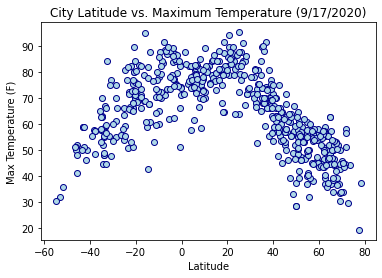

In [11]:
x_data = weather_data["Lat"]
y_data = weather_data["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
output_path_fig1 = os.path.join("..","output_data","fig1.png")
plt.savefig(output_path_fig1)

## Latitude vs. Humidity Plot

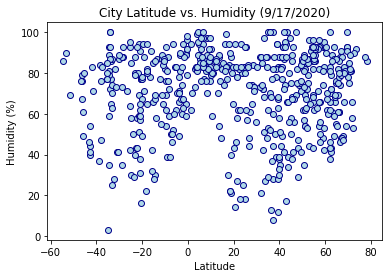

In [12]:
x_data = weather_data["Lat"]
y_data = weather_data["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
output_path_fig2 = os.path.join("..","output_data","fig2.png")
plt.savefig(output_path_fig2)

## Latitude vs. Cloudiness Plot

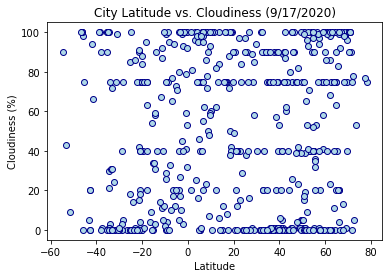

In [13]:
x_data = weather_data["Lat"]
y_data = weather_data["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
output_path_fig3 = os.path.join("..","output_data","fig3.png")
plt.savefig(output_path_fig3)

## Latitude vs. Wind Speed Plot

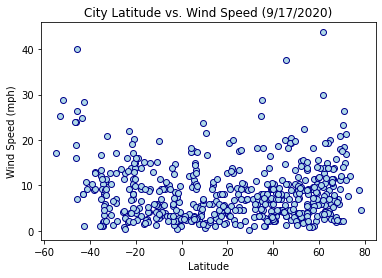

In [14]:
x_data = weather_data["Lat"]
y_data = weather_data["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"City Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
output_path_fig4 = os.path.join("..","output_data","fig4.png")
plt.savefig(output_path_fig4)

## Linear Regression

In [15]:
# Split dataset into Hemispheres: Nothern = lat > 0, southern = lat < 0
northern_hemisphere = weather_data[weather_data["Lat"] > 0]
southern_hemisphere = weather_data[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.8181098734307375


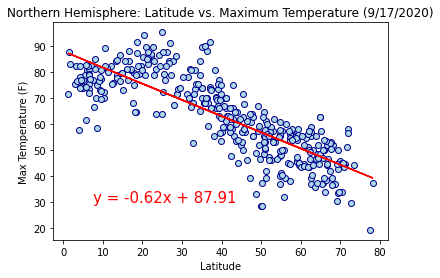

In [16]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig5 = os.path.join("..","output_data","fig5.png")
plt.savefig(output_path_fig5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.7123724339900921


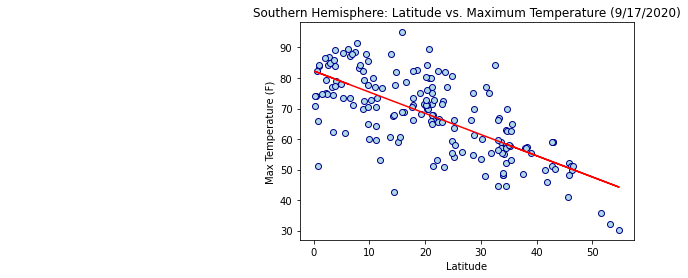

In [17]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Max Temp"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Maximum Temperature ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig6 = os.path.join("..","output_data","fig6.png")
plt.savefig(output_path_fig6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = -0.08166369111309414


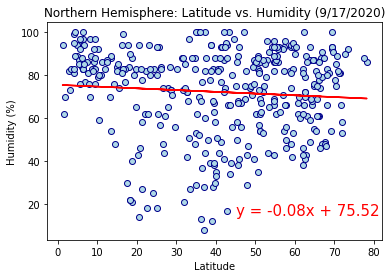

In [18]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (45, 15), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig7 = os.path.join("..","output_data","fig7.png")
plt.savefig(output_path_fig7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = -0.09027291392276404


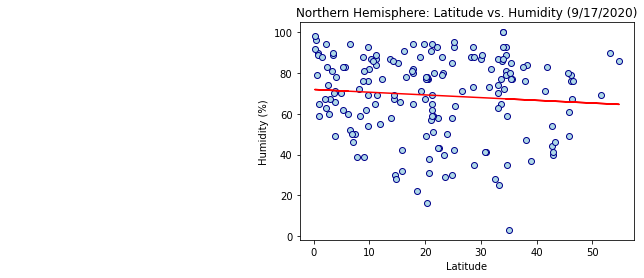

In [19]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Humidity"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig8 = os.path.join("..","output_data","fig8.png")
plt.savefig(output_path_fig8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.007842192554686597


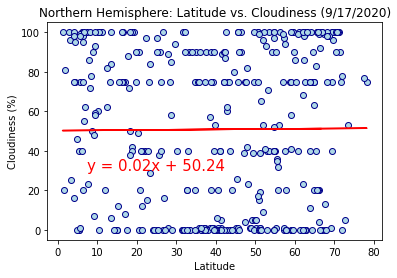

In [20]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig9 = os.path.join("..","output_data","fig9.png")
plt.savefig(output_path_fig9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = -0.08622950328862088


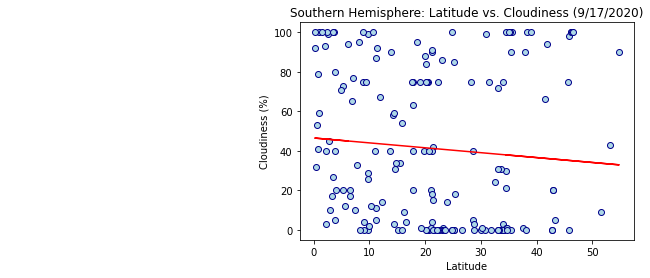

In [21]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Cloudiness"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Cloudiness ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-55, 50), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig10 = os.path.join("..","output_data","fig10.png")
plt.savefig(output_path_fig10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.17982273519227454


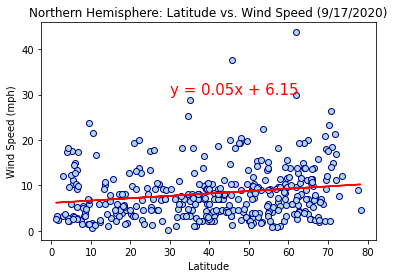

In [22]:
x_data = northern_hemisphere["Lat"]
y_data = northern_hemisphere["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Northern Hemisphere: Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (30, 30), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig11 = os.path.join("..","output_data","fig11.png")
plt.savefig(output_path_fig11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.42411720648798273


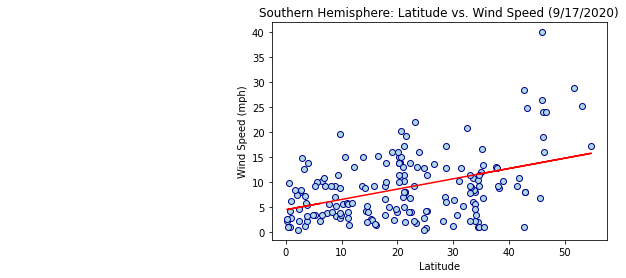

In [23]:
x_data = southern_hemisphere["Lat"]*-1
y_data = southern_hemisphere["Wind Speed"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"Southern Hemisphere: Latitude vs. Wind Speed ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
output_path_fig12 = os.path.join("..","output_data","fig12.png")
plt.savefig(output_path_fig12)